In [3]:
import scipy.stats as st
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species']=df['species'].map({i:name for i,name in enumerate(iris.target_names)})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
x_ic=df['petal length (cm)']
n=len(x_ic)
mean_ic=np.mean(x_ic)
std_ic=np.std(x_ic, ddof=1)
se_ic=std_ic/np.sqrt(n)
tcrit=st.t.ppf(0.975, df=n-1)
ic=(mean_ic-tcrit*se_ic, mean_ic+tcrit*se_ic)
print(f"Intervalo de confianza del 95% para la media de la longitud del pétalo: {ic}")


Intervalo de confianza del 95% para la media de la longitud del pétalo: (np.float64(3.473185370199511), np.float64(4.04281462980049))


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Matriz de correlación de Pearson:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


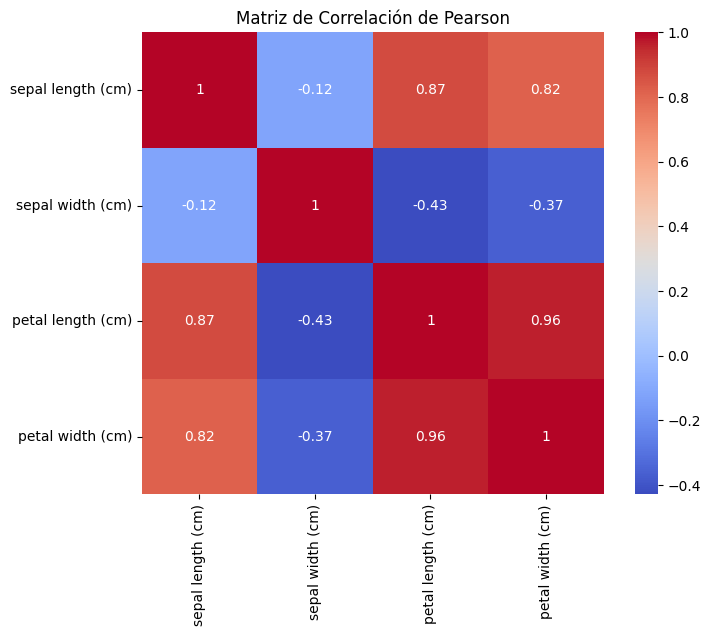

In [7]:
features = iris.feature_names

corr_p=df[features].corr(method='pearson')

print("Matriz de correlación de Pearson:")
print(corr_p)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_p, annot=True, cmap='coolwarm', square=True)
plt.title("Matriz de Correlación de Pearson")
plt.show()



In [8]:
import math
from scipy.stats import binom

In [9]:
n=20
p=0.02
k=2
prob=binom.pmf(k, n, p)
print(f"La probabilidad de que exactamente {k} de las {n} piezas estén defectuosas es: {prob:.4f}")

La probabilidad de que exactamente 2 de las 20 piezas estén defectuosas es: 0.0528


In [10]:
media=n*p
varianza=n*p*(1-p)
desviacion_estandar=math.sqrt(varianza)
print(f"Media: {media}, Varianza: {varianza}, Desviación Estándar: {desviacion_estandar:.4f}")

Media: 0.4, Varianza: 0.392, Desviación Estándar: 0.6261


In [11]:
n_aumentada=100
media_aumentada=n_aumentada*p
varianza_aumentada=n_aumentada*p*(1-p)
desviacion_estandar_aumentada=math.sqrt(varianza_aumentada)
print(f"Con n={n_aumentada} piezas - Media: {media_aumentada}, Varianza: {varianza_aumentada}, Desviación Estándar: {desviacion_estandar_aumentada:.4f}")

Con n=100 piezas - Media: 2.0, Varianza: 1.96, Desviación Estándar: 1.4000


In [12]:
from scipy.stats import norm
x_inferior=1.5
x_superior=2.5
prob_normal=norm.cdf(x_superior, media_aumentada, desviacion_estandar_aumentada-norm.cdf(x_inferior,media_aumentada, desviacion_estandar_aumentada))

print(f"Probabilidad normal:{prob_normal}")

Probabilidad normal:0.6847406769671436


In [13]:
df['sepal_cat']=pd.qcut(df['sepal length (cm)'], q=3, labels=['Corto', 'Medio', 'Largo'])

count=pd.crosstab(df['sepal_cat'], df['species'])

chi2, p_valor,dof,expected= st.chi2_contingency(count)
print("Tabla de contingencia:")
print(count)

print(f"Estadístico Chi-cuadrado: {chi2:.4f}, p-valor: {p_valor}, Grados de libertad: {dof}")


Tabla de contingencia:
species    setosa  versicolor  virginica
sepal_cat                               
Corto          45           6          1
Medio           5          33         18
Largo           0          11         31
Estadístico Chi-cuadrado: 123.2830, p-valor: 1.0624436052362445e-25, Grados de libertad: 4


In [14]:
setosa=df[df.species=='setosa']['sepal length (cm)']
virginica=df[df.species=='virginica']['sepal length (cm)']

tstat,p_valor=st.ttest_ind(setosa, virginica, equal_var=False)
print(f"Prueba t de Student entre setosa y virginica para la longitud del sépalo:")
print(f"Estadístico t: {tstat:.4f}, p-valor: {p_valor}")

Prueba t de Student entre setosa y virginica para la longitud del sépalo:
Estadístico t: -15.3862, p-valor: 3.9668672709859296e-25


In [15]:
s1=df[df.species=='setosa']['petal length (cm)']
s2=df[df.species=='versicolor']['petal length (cm)']
s3=df[df.species=='virginica']['petal length (cm)']
Fstat, p_valor=st.f_oneway(s1, s2, s3)
print(f"ANOVA de un factor para la longitud del pétalo entre las tres especies:")
print(f"Estadístico F: {Fstat}, p-valor: {p_valor}")

ANOVA de un factor para la longitud del pétalo entre las tres especies:
Estadístico F: 1180.161182252981, p-valor: 2.856776610961539e-91
